# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


The objective of this experiment is to understand word2vec.

In this experiment we will use **Mahabharata** as our text corpus

#### Keywords

* Word2Vec
* Representation
* Train, Test split
* Visualization



The problem with count-based word representations is that they are costly in terms of memory to compute large co-occurrence matrices. Let us see another method to find representations of words without explicitly counting words.

Here, we aim to predict the next word given the context in which the word appears. (For example, given the last $n$ words, predict the next word). A very smart way to do this is by using a feature representation called "Word2Vec" with transforms each word into 300-dimensional vectors.

### Expected Time : 60mins

#### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="M1E5_Word2vec_Mahabharata" #name of the notebook
Answer = "This notebook is not graded"

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Saturday_Experiment/MB.txt")
  
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Saturday_Experiment/MB2Vec.bin")
  
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Saturday_Experiment/stopwords.txt")
 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Saturday_Experiment/word2vec.png")
 
    ipython.magic("sx pip3 install gensim")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [6]:
!ls /content

M1E5_Word2vec_Mahabharata.ipynb  MB.txt       stopwords.txt
MB2Vec.bin			 sample_data  word2vec.png


#### Importing the required packages

In [0]:
#vector space modeling and topic modeling toolkit
import gensim

# Operating System
import os

# Regular Expression
import re

# nltk packages
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer

# Basic Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# PCA from scikit learn
from sklearn.decomposition import PCA

**Snowball** is a small string processing language designed for creating stemming algorithms for use in Information Retrieval. 

#### Creating a new instance of a language specific subclass.

In [0]:
stemmer = SnowballStemmer("english")
!cat stopwords.txt

### Preprocessing

1. Cleaning dataset for text encoding issues :- Very useful when dealing with non-unicode characters
2. Creating a set of vocabulary excluding the stopwords
3. Stemming a word.
    
        Eg: print(stemmer.stem("running"))
    
        run

In [0]:
stopWords = pd.read_csv('stopwords.txt').values

class MySentences(object):
    def __init__(self, fnamelist):
        self.fnamelist = fnamelist
        # Creating a set of vocabulary
        self.vocabulary = set([])

    def __iter__(self):
        for fname in self.fnamelist:
            for line in open(fname, encoding='latin1'):
                words = re.findall(r'(\b[A-Za-z][a-z]{2,15}\b)', line)
                # Stemming a word.
                words = [ stemmer.stem(word.lower()) for word in words if not word.lower() in stopWords]
                for word in words:
                    self.vocabulary.add(word)
                yield words

Now, Let us read the data using an iterator in the class MySentences() which is a memory-friendly iterator. Load the pretrained vectors using gensim package.


In [0]:
sentences = MySentences(['MB.txt'])

##parameter -  min_count (int, optional) => Ignores all words with total frequency lower than this.
model = gensim.models.Word2Vec(sentences, min_count=100)

Now Let us see what are the similar words related to certain characters names.

In [13]:
model.wv.most_similar('krishna')[:10]

[('kesava', 0.8532780408859253),
 ('vasudeva', 0.8098731637001038),
 ('govinda', 0.7791403532028198),
 ('madhava', 0.7374037504196167),
 ('vibhatsu', 0.7294748425483704),
 ('dhananjaya', 0.7148695588111877),
 ('nala', 0.7010267972946167),
 ('arjuna', 0.6889191269874573),
 ('janardana', 0.667270302772522),
 ('phalguna', 0.6625979542732239)]

In [14]:
model.wv.most_similar('arjuna')[:10]

[('partha', 0.9015891551971436),
 ('dhananjaya', 0.8164287805557251),
 ('vibhatsu', 0.8039588928222656),
 ('kama', 0.7919028997421265),
 ('aswatthaman', 0.7841848731040955),
 ('vrikodara', 0.7754022479057312),
 ('bhima', 0.7727867364883423),
 ('satyaki', 0.7685065269470215),
 ('salya', 0.7596731781959534),
 ('abhimanyu', 0.7507518529891968)]

In [15]:
model.wv.most_similar('virata')[:3]

[('drupada', 0.8640484809875488),
 ('chedi', 0.8429356813430786),
 ('kasi', 0.8356711864471436)]

We will save the trained vectors

In [0]:
model.save("MB2Vec.bin")

In [0]:
model_load = gensim.models.Word2Vec.load('MB2Vec.bin')

Constructing the word and vector list by iterating through the vocabulary of the pretrained model.

In [0]:
words_list = np.array([])
vector_list = np.array([])
for i in model.wv.vocab:
    try :
        words_list = np.append(words_list, i)
        vector_list = np.append(vector_list, model[i])
    except :
        pass
vector_list = vector_list.reshape(len(model.wv.vocab), -1)

In [36]:
# my code 
words_list = np.array([])
vector_list = np.array([])
x = 0
for i in model.wv.vocab:
    x = len(i)
    try :
        # here i is list of words
        words_list = np.append(words_list, i)
        
        # here model[i] is a list of numbers
        vector_list = np.append(vector_list, model[i])
    except :
        pass

print("len(model.wv.vocab[0]) = ", x)
print(words_list[:10])
print(vector_list[:10])

print("len(vector_list) = ", len(vector_list))
print("len(model.wv.vocab) = ", len(model.wv.vocab))
vector_list = vector_list.reshape(len(model.wv.vocab), -1)

len(model.wv.vocab[0]) =  6
['translat' 'origin' 'text' 'king' 'thou' 'hast' 'duli' 'unto' 'path'
 'yoga']
[-0.55321985 -1.10179448 -0.35505918 -0.08421702  0.88500047  0.21163715
 -0.73252141  0.26676193 -0.57179904 -0.46769807]
len(vector_list) =  170100
len(model.wv.vocab) =  1701


In [27]:
vector_list.shape

(1701, 100)

As vector_list dimenssion are huge in order to reduce the dimenssion of the vector_list we will use PCA on the vector_list to reduce it dimenssion to 2.

In [0]:
#pca = PCA(n_components=2)
pca = PCA(n_components=3)
pca.fit(vector_list)
compressed_list =pca.transform(vector_list)

Now let us check the shape of the vector_list before reducing its dimenssions.

In [31]:
vector_list.shape

(1701, 100)

Let us check the shape the of  vector_list (compressed_list) after reducing its dimenssion using PCA.

In [32]:
compressed_list.shape

(1701, 3)

Now, let us find the location of some characters in word_list to get the locations.

In [52]:
characters = ['govinda','kesava','dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
locs = [np.where(words_list == x)[0] for x in characters]
print(locs)


[array([], dtype=int64), array([1441]), array([1627]), array([1626]), array([1522]), array([19]), array([1245]), array([1500]), array([1232]), array([245]), array([1659]), array([1572]), array([1381]), array([1646]), array([1531]), array([1603])]


In [57]:
characters = ['govinda','kesava','dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
locs = [np.where(words_list == x)[0][0] for x in characters]
print(locs)
print(pca.transform([model[characters[0]]]))
print(pca.transform([model[characters[0]]])[0])
print(words_list[locs[0]])

[1464, 1441, 1627, 1626, 1522, 19, 1245, 1500, 1232, 245, 1659, 1572, 1381, 1646, 1531, 1603]
[[-0.4117532  -0.97527413  0.59977396]]
[-0.4117532  -0.97527413  0.59977396]
govinda


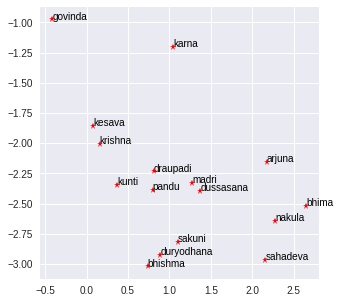

In [55]:
%matplotlib inline
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
for character, pos in zip(characters, locs):
    m = model[character]
    value = pca.transform([m])[0]
    ax.plot(value[0], value[1], "r*")
    #ax.scatter(value[0], value[1], value[2])
    #ax.annotate(words_list[pos], xy=value, xytext=value)
    ax.text(value[0], value[1], '%s' % (words_list[pos]), zorder=1, color='k')
plt.show()
fig.savefig('word2vec.png')

To get more sense of what actually we did till now. let us visualize the data

In [58]:
%matplotlib inline
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,  projection='3d')
for character, pos in zip(characters, locs):
    m = model[character]
    value = pca.transform([m])[0]
    #ax.plot(value[0], value[1], "r*")
    ax.scatter(value[0], value[1], value[2])
    #ax.annotate(words_list[pos], xy=value, xytext=value)
    ax.text(value[0], value[1], value[2], '%s' % (words_list[pos]), zorder=1, color='k')
plt.show()
fig.savefig('word2vec.png')

ValueError: ignored

<Figure size 648x648 with 0 Axes>

Now let us see the most similar characters related to characters list as show below

#### characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']

In [63]:
for character in characters:
    near = model.most_similar(character)[:5]
    nearNames = [x[0] for x in near]
    print(character, ':'.join(nearNames), sep="\t")

govinda	kesava:vasudeva:janarddana:madhava:krishna
kesava	govinda:vasudeva:krishna:madhava:spake
dussasana	sakuni:duhsasana:vikarna:chitrasena:valhika
sakuni	dussasana:duhsasana:vikarna:suvala:valhika
duryodhana	dussasana:suyodhana:sakuni:jayadratha:dhritarashtra
bhishma	salya:sanjaya:vaisampayana:savyasachin:kripa
krishna	kesava:vasudeva:govinda:madhava:vibhatsu
madri	somadatta:subhadra:prishata:suvala:valiant
pandu	pritha:kunti:radha:suta:subhadra
kunti	pritha:radha:pandu:suta:santanu
karna	duhsasana:yuyudhana:abhimanyu:bhagadatta:kichaka
bhima	bhimasena:vrikodara:abhimanyu:satyaki:ghatotkacha
arjuna	partha:dhananjaya:vibhatsu:kama:aswatthaman
nakula	sahadeva:vikarna:duhsasana:chitrasena:satyaki
sahadeva	nakula:vikarna:satyaki:chitrasena:dhrishtadyumna
draupadi	drupada:dussasana:madri:uncl:sakuni


### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "GOOd" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [68]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3014
Date of submission:  28 Mar 2019
Time of submission:  22:01:37
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
